In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import numpy as np
from poly import *
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})
plt.style.use('bmh')

np.set_printoptions(edgeitems=3, infstr='inf',
linewidth=75, nanstr='nan', precision=3,
suppress=False, threshold=1000, formatter=None)

In [3]:
f = lambda x: (np.sin(np.pi*x))**2
# f = lambda x: 2*x**2-1
# f = lambda x: x/2 - np.sin(2*np.pi*x)/(4*np.pi)+1/2
int_f = lambda x: x/2 - np.sin(2*np.pi*x)/(4*np.pi)+1/2


n = 27
x_interpol = chebyshev_points(n-1)
y_interpol = f(x_interpol)

cheb_coeff = chebyshev_coefficients(y_interpol)
Q_ma = q_matrix_cheb(n)
mon = cheby_to_monomial(n+1)@Q_ma@cheb_coeff
cbm = chebyshev_base_matrix(n-1, x_interpol)

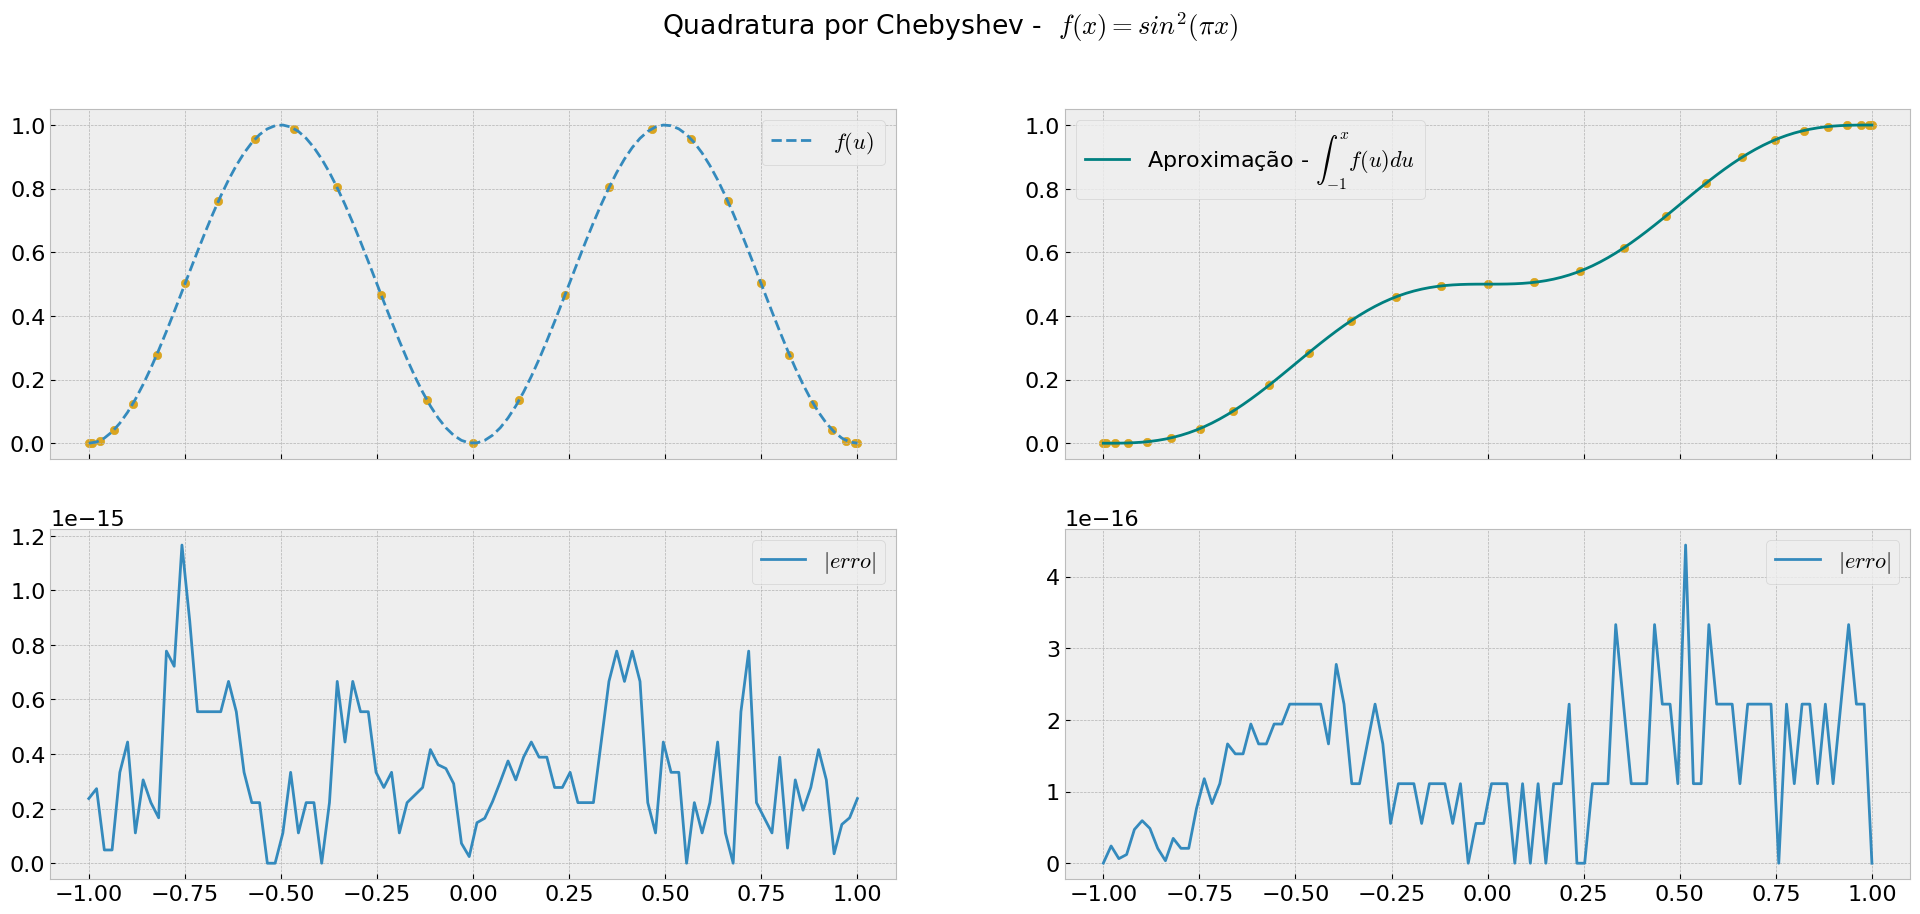

In [4]:
x_eval = np.linspace(-1, 1, 100)

y_cheb = chebyshev_base_matrix(n-1, x_eval)@cheb_coeff
fig, ax = plt.subplots(2, 2, figsize=(24,10), sharex = True)
ax[0, 0].plot(x_eval, y_cheb, linestyle ="--", label=r"$f(u)$ ")
ax[0, 0].scatter(x_interpol, y_interpol, color = "goldenrod", marker="o",)

ax[1, 0].plot(x_eval, np.abs(f(x_eval)-y_cheb), label = r"$|erro|$")


int_f_cheb = chebyshev_base_matrix(n, x_eval)@Q_ma@cheb_coeff
ax[0, 1].scatter(x_interpol, int_f(x_interpol), color = "goldenrod", marker="o")
ax[0, 1].plot(x_eval, int_f_cheb, color="teal", label=r"Aproximação - $\int_{-1}^{x}f(u)du$ ")
ax[1, 1].plot(x_eval, np.abs(int_f_cheb - int_f(x_eval)), label = r"$|erro|$" )

ax[0,0].legend()
ax[1,0].legend()
ax[0, 1].legend()
ax[1, 1].legend()

fig.suptitle(r"Quadratura por Chebyshev -  $f(x) = sin^2(\pi x)$")

fig.savefig("images/quad_cheb.pdf")

In [5]:
x_gll, w, P_ll, invP_ll = GLLobatto(n-1)
y_leg = f(x_gll)
legendre_coeff = invP_ll@y_leg
Q_legendre = q_matrix_leg(n-1)
int_legendre_coeff = Q_legendre@legendre_coeff
integral_y_legendre = legendre_basis(n, x_eval)@int_legendre_coeff
y_legendre = legendre_basis(n-1, x_eval)@legendre_coeff

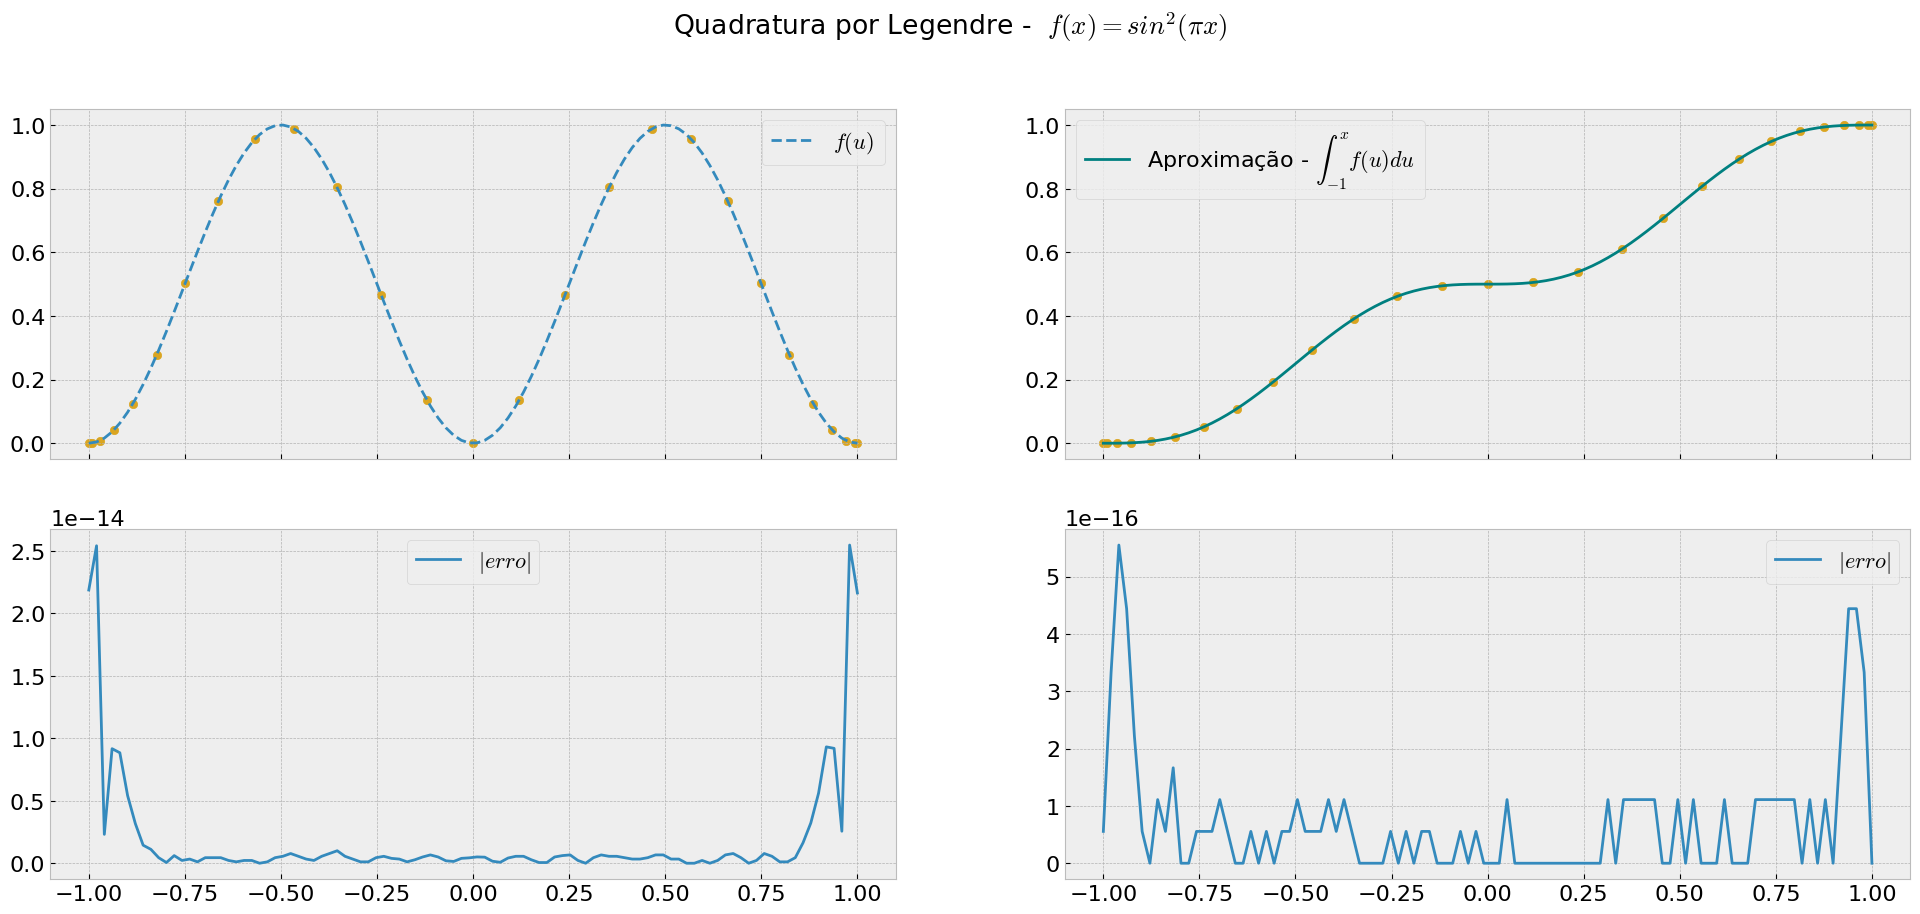

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(24,10), sharex = True)
x_int = np.linspace(-1, 1, 100)
ax[0, 0].plot(x_eval, y_legendre, linestyle ="--", label=r"$f(u)$ ")
ax[0, 0].scatter(x_interpol, f(x_interpol), color = "goldenrod", marker="o",)
ax[1, 0].plot(x_eval, np.abs(y_legendre-f(x_eval)), label = r"$|erro|$")


ax[0, 1].scatter(x_gll, int_f(x_gll), color = "goldenrod", marker="o")
ax[0, 1].plot(x_eval, integral_y_legendre, color="teal", label=r"Aproximação - $\int_{-1}^{x}f(u)du$ ")
ax[1, 1].plot(x_eval, np.abs(integral_y_legendre - int_f(x_int)), label = r"$|erro|$" )

ax[0,0].legend()
ax[1,0].legend()
ax[0, 1].legend()
ax[1, 1].legend()

fig.suptitle(r"Quadratura por Legendre -  $f(x) = sin^2(\pi x)$")

fig.savefig("images/quad_legendre.pdf")

In [7]:
F = lambda x: np.cos(np.pi*x)


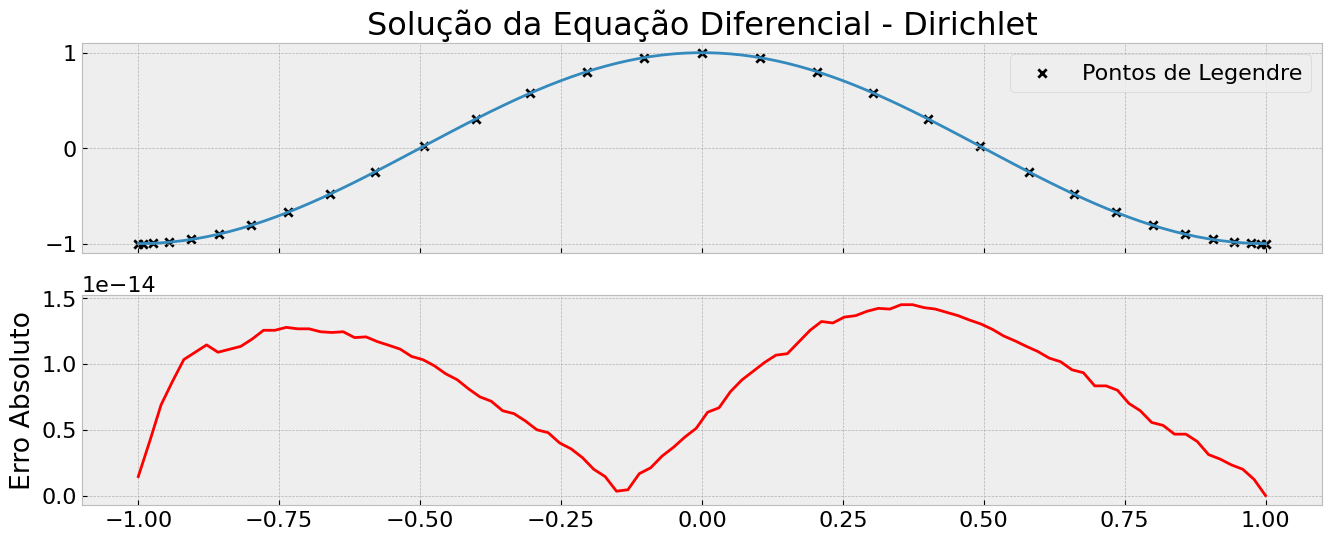

In [8]:
F = lambda x: np.cos(np.pi*x)
x_eval = np.linspace(-1, 1, 100)

n = 30
xs,ws,Bn,invBn = GLLobatto(n)
D = generalized_diff_matrix(xs); D2 = D@D; II = np.eye(n+1);
xm = xs[1:n];
Sm = D2[1:n,:] + D[1:n,:] + np.pi*np.pi*II[1:n,:];
RHSm = -np.pi*np.sin(np.pi*xm);

Sc = np.zeros((2,n+1)); Sc[0,0] = 1; Sc[1,n] = 1;
RHSc = [-1, -1];
S = np.vstack([Sm, Sc]) 
RHS = np.hstack([RHSm, RHSc])

y = np.linalg.solve(S, RHS);

y_hat = BarycentricLagrangeInterpolator(xs, y).eval(x_eval)

fig, ax = plt.subplots(2, 1, figsize=(16,6), sharex=True)
ax[0].plot(x_eval, F(x_eval))
ax[0].scatter(xs, y, label="Pontos de Legendre", marker = "x", c="k")
ax[1].plot(x_eval, np.abs(F(x_eval)-y_hat), color="r")
ax[1].set_ylabel("Erro Absoluto")
ax[0].set_title("Solução da Equação Diferencial - Dirichlet")
ax[0].legend()
plt.savefig("images/eq_diff_legendre_drichlet.pdf")


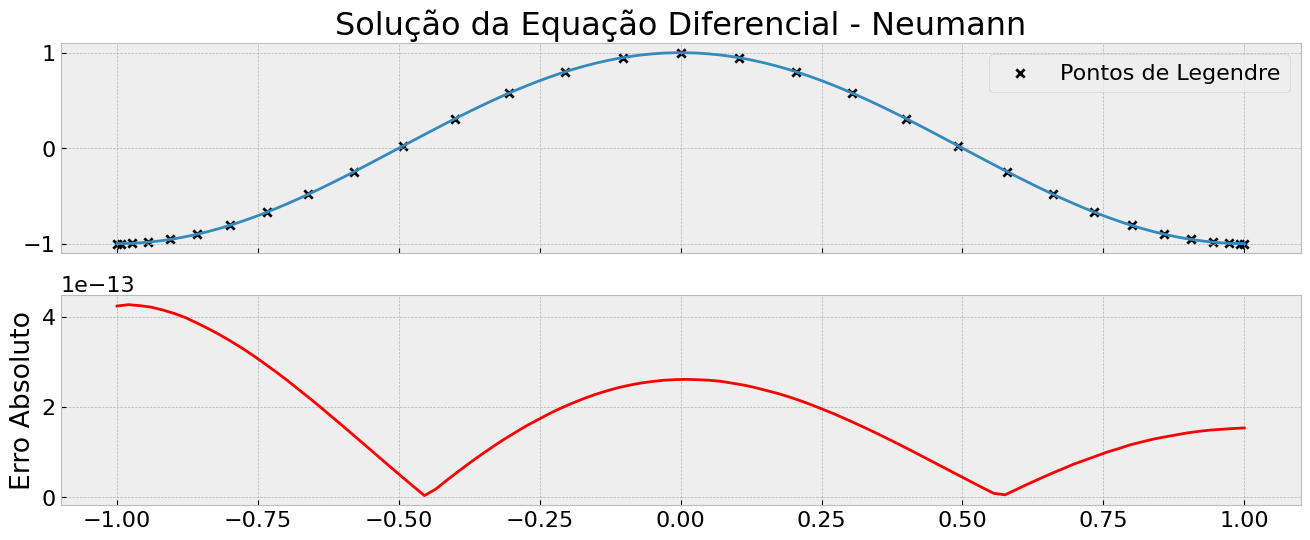

In [9]:
F = lambda x: np.cos(np.pi*x)
x_eval = np.linspace(-1, 1, 100)

n = 30
xs,ws,Bn,invBn = GLLobatto(n)
D = generalized_diff_matrix(xs); D2 = D@D; II = np.eye(n+1);
xm = xs[1:n];
Sm = D2[1:n,:] + D[1:n,:] + np.pi*np.pi*II[1:n,:];
RHSm = -np.pi*np.sin(np.pi*xm);

Sc = np.zeros((2,n+1)); Sc[0,:] = D[0,:]; Sc[1,:] = D[-1, :];
RHSc = [0, 0];
S = np.vstack([Sm, Sc]) 
RHS = np.hstack([RHSm, RHSc])

y = np.linalg.solve(S, RHS);

y_hat = BarycentricLagrangeInterpolator(xs, y).eval(x_eval)

fig, ax = plt.subplots(2, 1, figsize=(16,6), sharex=True)
ax[0].plot(x_eval, F(x_eval))
ax[0].scatter(xs, y, label="Pontos de Legendre", marker = "x", c="k")
ax[1].plot(x_eval, np.abs(F(x_eval)-y_hat), color="r")
ax[1].set_ylabel("Erro Absoluto")
ax[0].set_title("Solução da Equação Diferencial - Neumann")
ax[0].legend()
plt.savefig("images/eq_diff_legendre_neumann.pdf")


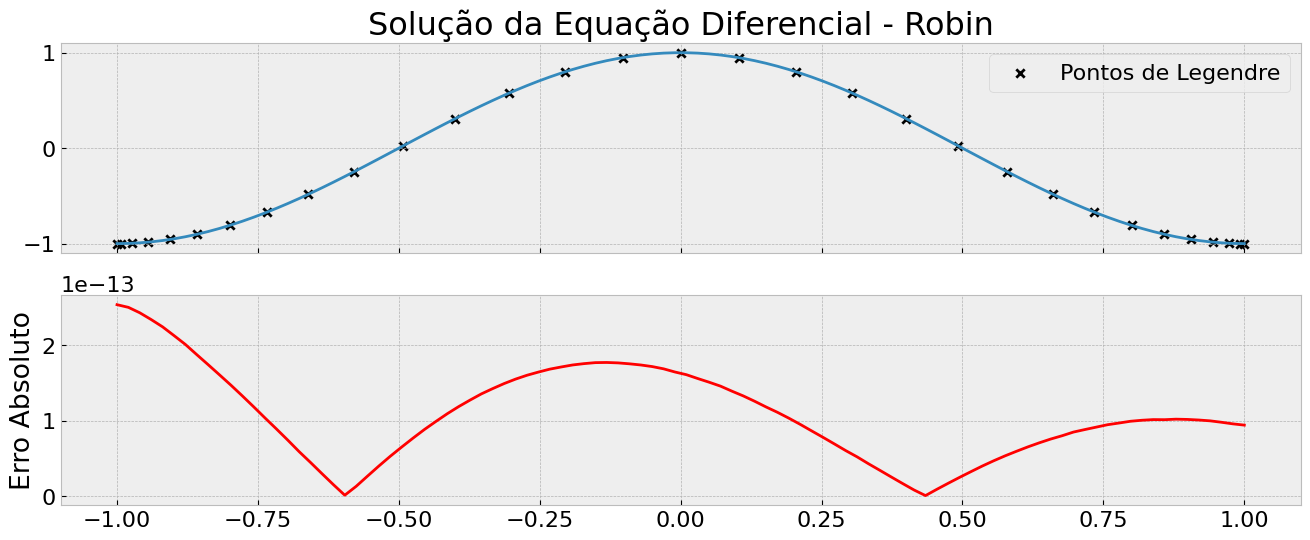

In [10]:
F = lambda x: np.cos(np.pi*x)
x_eval = np.linspace(-1, 1, 100)

n = 30
xs,ws,Bn,invBn = GLLobatto(n)
D = generalized_diff_matrix(xs); D2 = D@D; II = np.eye(n+1);
xm = xs[1:n];
Sm = D2[1:n,:] + D[1:n,:] + np.pi*np.pi*II[1:n,:];
RHSm = -np.pi*np.sin(np.pi*xm);

Sc = np.zeros((2,n+1)) 
Sc[0,0] = 1
Sc[1,n] = 1

Sc[0,:] = Sc[0,:]+D[0,:]
Sc[1,:] = Sc[1,:]+D[-1,:]
RHSc = [-1, -1];
S = np.vstack([Sm, Sc]) 
RHS = np.hstack([RHSm, RHSc])

y = np.linalg.solve(S, RHS);

y_hat = BarycentricLagrangeInterpolator(xs, y).eval(x_eval)

fig, ax = plt.subplots(2, 1, figsize=(16,6), sharex=True)
ax[0].plot(x_eval, F(x_eval))
ax[0].scatter(xs, y, label="Pontos de Legendre", marker = "x", c="k")
ax[1].plot(x_eval, np.abs(F(x_eval)-y_hat), color="r")
ax[1].set_ylabel("Erro Absoluto")
ax[0].set_title("Solução da Equação Diferencial - Robin")
ax[0].legend()
plt.savefig("images/eq_diff_legendre_robin.pdf")
